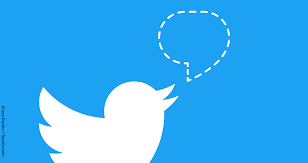

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
# for stopwords Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
# for regular expressions
import re
from nltk.stem.porter import PorterStemmer

In [ ]:
train_df=pd.read_csv('../input/nlp-getting-started/train.csv')

# عرض اول عشر صفوف

In [ ]:
train_df.head(10)

# عرض بعض المعلومات عن البيانات

In [ ]:
train_df.info()

In [ ]:
print("Shape of Data is: ",train_df.shape)


# عمل تنظيف للبيانات 

In [ ]:
train_df.drop(['id','keyword', 'location'], axis=1)

# إزالة علامات الترقيم والأرقام

In [ ]:
# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

train_df['text'] = train_df['text'].apply(punctuation_removal)

In [ ]:
# lets make a function to remove Numbers from the reviews
import re
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

train_df['text'] = train_df['text'].apply(drop_numbers)

In [ ]:
train_df['text'].head()

In [ ]:
# lets plot the Wordscloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_df['text'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from text Reviews", fontsize = 20)
plt.show()

# Feature Extraction

 ### Bag of Words

The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [ ]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
df=cv.fit_transform(train_df['text']).toarray()
x = df[:,[ 0]]
y = train_df['target'].values

print(x.shape)
print(y.shape)

In [ ]:
print("Shape of X:",len(x))
print("Shape of Y:",len(y))

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Decision Tree Classification

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1000)
classifier1.fit(X_train, y_train)


In [ ]:
# Predicting the Test set results
y_pred = classifier1.predict(X_test)
print('Y_pred :',y_pred)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
score=classifier1.score(X_test,y_pred)
score

## Random Forest Classification

In [ ]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
score=classifier.score(X_test,y_pred)
score

In [ ]:
import nltk
nltk.download('wordnet')


In [ ]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

train_df['text'] = train_df['text'].apply(remove_stopword)

In [ ]:
train_df['text'].values

# تصنيف الكلمات الى السلبى والايجابى

In [ ]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"
    
train_df['polarity'] = train_df['text'].apply(get_polarity)

In [ ]:
train_df['polarity'].value_counts()